# The Spark Foundation: Data Science and Business Analytics Internship

## Task-6: To Explore Decision Tree Algorithm

### Author- Sana

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np

In [3]:
# Importing Data set
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From this info() I can say that their no null values are present inthe dataset

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Splitting into x and y
X = df.values[:,:-1]
Y = df.values[:,-1]

In [8]:
# Checking the shape
X.shape

(150, 5)

In [9]:
Y.shape

(150,)

In [11]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105,)
(45,)


In [13]:
# Building the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
# Doing prediction on x_test
y_pred = dtc.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc) 

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy of the model:  1.0


[Text(558.0, 755.0, '[1 5.1 3.5 1.4 0.2] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris-setosa'),
 Text(372.0, 453.0, '[5 5.0 3.6 1.4 0.2] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]\nclass = Iris-setosa'),
 Text(186.0, 151.0, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-setosa'),
 Text(558.0, 151.0, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-setosa'),
 Text(744.0, 453.0, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = Iris-setosa')]

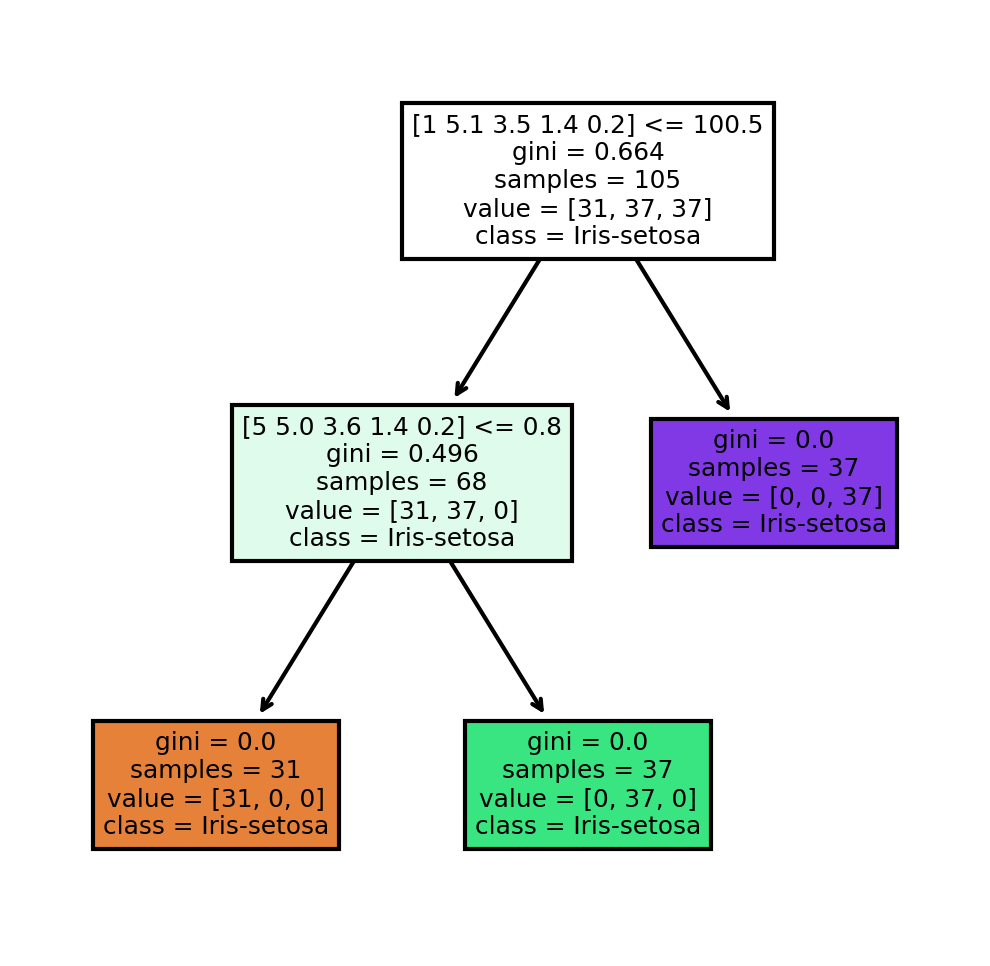

In [33]:
# Visualizing the tree

from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi = 300)

tree.plot_tree(dtc, feature_names = X, class_names = Y, filled = True)